# 9-3. Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÏûÖÎ†• Ïù¥Ìï¥ÌïòÍ∏∞
Î®ºÏ†Ä ÏïûÏúºÎ°ú ÏßÑÌñâÌïòÎ©¥ÏÑú ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄÎ•º ÏûÑÌè¨Ìä∏ÌïòÍ≤†ÏäµÎãàÎã§!

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("Ïäù=3")

Ïäù=3


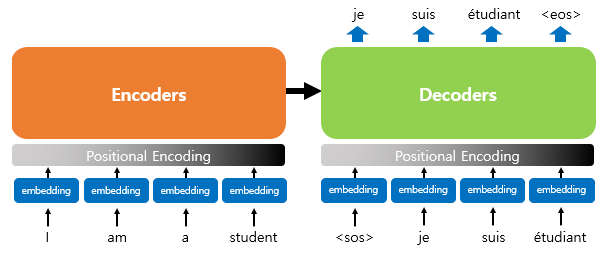   
ÎßéÏùÄ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Î™®Îç∏Îì§ÏùÄ ÌÖçÏä§Ìä∏ Î¨∏Ïû•ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÏúÑÌï¥ Îã®Ïñ¥Î•º ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌïòÎäî Î≤°ÌÑ∞Ìôî Í≥ºÏ†ïÏùÑ Í±∞Ïπ©ÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎòêÌïú Í∑∏ Ï†êÏóêÏÑúÎäî Îã§Î•∏ Î™®Îç∏Îì§Í≥º Îã§Î•¥ÏßÄ ÏïäÏäµÎãàÎã§. ÌïòÏßÄÎßå Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ÏóêÎäî RNN Í≥ÑÏó¥Ïùò Î™®Îç∏Îì§Í≥º Îã§Î•∏ Ï†êÏù¥ Ìïú Í∞ÄÏßÄ ÏûàÏäµÎãàÎã§. Î∞îÎ°ú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê Ïñ¥Îñ§ Í∞íÏùÑ ÎçîÌï¥Ï§Ä Îí§Ïóê ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§Îäî Ï†êÏûÖÎãàÎã§. Í∑∏ Í∞íÏùÄ Î∞îÎ°ú ÏúÑ Í∑∏Î¶ºÏóêÏÑúÏùò Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(positional Encoding)Ïóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏûÖÎãàÎã§.

ÏúÑ Í∑∏Î¶ºÏóêÏÑú Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†• Î∂ÄÎ∂ÑÏùÑ Ï°∞Í∏à Îçî ÌôïÎåÄÌï¥ Î≥∏Îã§Î©¥ Ïù¥Îü∞ Í∑∏Î¶ºÏù¥ ÎÇòÏò§Í≤†Ï£†?   
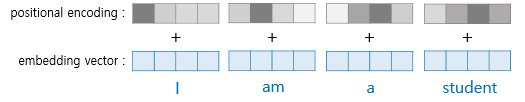   
Ïù¥Î†áÍ≤å Ìï¥Ï£ºÎäî Ïù¥Ïú†Îäî Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏûÖÎ†•ÏùÑ Î∞õÏùÑ Îïå, Î¨∏Ïû•Ïóê ÏûàÎäî Îã®Ïñ¥Îì§ÏùÑ 1Í∞úÏî© ÏàúÏ∞®Ï†ÅÏúºÎ°ú Î∞õÎäî Í≤ÉÏù¥ ÏïÑÎãàÎùº, Î¨∏Ïû•Ïóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥Î•º ÌïúÍ∫ºÎ≤àÏóê ÏûÖÎ†•ÏúºÎ°ú Î∞õÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Ìä∏ÎûúÏä§Ìè¨Î®∏Í∞Ä RNNÍ≥º Í≤∞Ï†ïÏ†ÅÏúºÎ°ú Îã§Î•∏ Ï†êÏù¥ Î∞îÎ°ú Ïù¥ Î∂ÄÎ∂ÑÏûÖÎãàÎã§. RNNÏóêÎäî Ïñ¥Ï∞®Ìîº Î¨∏Ïû•ÏùÑ Íµ¨ÏÑ±ÌïòÎäî Îã®Ïñ¥Îì§Ïù¥ Ïñ¥ÏàúÎåÄÎ°ú Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎØÄÎ°ú, Î™®Îç∏ÏóêÍ≤å Îî∞Î°ú Ïñ¥Ïàú Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï§Ñ ÌïÑÏöîÍ∞Ä ÏóÜÏóàÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò Î¨∏Ïû•Ïóê ÏûàÎäî Î™®Îì† Îã®Ïñ¥Î•º ÌïúÍ∫ºÎ≤àÏóê Î¨∏Ïû• Îã®ÏúÑÎ°ú ÏûÖÎ†•Î∞õÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏûêÏπ´ 'I ate lunch'ÏôÄ 'lunch ate I'Î•º Íµ¨Î∂ÑÌï† Ïàò ÏóÜÏùÑÏßÄÎèÑ Î™®Î¶ÖÎãàÎã§. Í∑∏ÎûòÏÑú Í∞ôÏùÄ Îã®Ïñ¥ÎùºÎèÑ Í∑∏ Îã®Ïñ¥Í∞Ä Î¨∏Ïû•Ïùò Î™á Î≤àÏß∏ Ïñ¥ÏàúÏúºÎ°ú ÏûÖÎ†•ÎêòÏóàÎäîÏßÄÎ•º Î™®Îç∏Ïóê Ï∂îÍ∞ÄÎ°ú ÏïåÎ†§ Ï£ºÍ∏∞ ÏúÑÌï¥, Îã®Ïñ¥Ïùò ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ÏóêÎã§Í∞Ä ÏúÑÏπò Ï†ïÎ≥¥Î•º Í∞ÄÏßÑ Î≤°ÌÑ∞(Positional Encoding) Í∞íÏùÑ ÎçîÌï¥ÏÑú Î™®Îç∏Ïùò ÏûÖÎ†•ÏúºÎ°ú ÏÇºÎäî Í≤ÉÏù¥ÏßÄÏöî!   
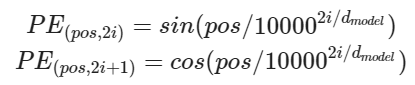   
Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©Ïùò Î≤°ÌÑ∞Í∞íÏùÄ ÏúÑÏùò ÏàòÏãùÏóê ÏùòÌï¥ÏÑú Ï†ïÌï¥ÏßëÎãàÎã§. ÏÇ¨Ïù∏ Ìï®ÏàòÏôÄ ÏΩîÏÇ¨Ïù∏ Ìï®ÏàòÏùò Í∑∏ÎûòÌîÑÎ•º ÏÉÅÍ∏∞Ìï¥Î≥¥Î©¥ ÏöîÎèôÏπòÎäî Í∞íÏùò ÌòïÌÉúÎ•º ÏÉùÍ∞ÅÌï¥ Î≥º Ïàò ÏûàÎäîÎç∞, Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÏÇ¨Ïù∏ Ìï®ÏàòÏôÄ ÏΩîÏÇ¨Ïù∏ Ìï®ÏàòÏùò Í∞íÏùÑ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïóê ÎçîÌï¥Ï§åÏúºÎ°úÏç® Îã®Ïñ¥Ïùò ÏàúÏÑú Ï†ïÎ≥¥Î•º ÎçîÌïòÏó¨ Ï§çÎãàÎã§.

ÏúÑÏùò Îëê Ìï®ÏàòÏóêÎäî pos, i, dmodel Îì± ÏÉùÏÜåÌïú Î≥ÄÏàòÎì§Ïù¥ ÏûàÏäµÎãàÎã§. ÏúÑÏùò Ìï®ÏàòÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏúÑÏóêÏÑú Î≥∏ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ÏôÄ Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©Ïùò ÎçßÏÖàÏùÄ ÏÇ¨Ïã§ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Í∞Ä Î™®Ïó¨ ÎßåÎì§Ïñ¥ÏßÑ Î¨∏Ïû• Î≤°ÌÑ∞ ÌñâÎ†¨Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© ÌñâÎ†¨Ïùò ÎçßÏÖà Ïó∞ÏÇ∞ÏùÑ ÌÜµÌï¥ Ïù¥Î£®Ïñ¥ÏßÑÎã§Îäî Ï†êÏùÑ Ïù¥Ìï¥Ìï¥Ïïº Ìï©ÎãàÎã§.   
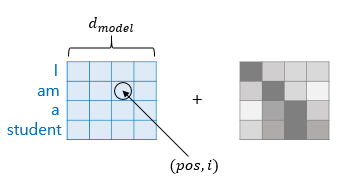   
dmodelÏùÄ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏùÑ ÏùòÎØ∏ÌïòÍ≥† ÏûàÍ≥†, posÎäî ÏûÖÎ†• Î¨∏Ïû•ÏóêÏÑúÏùò ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, iÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÎÇ¥Ïùò Ï∞®ÏõêÏùò Ïù∏Îç±Ïä§Î•º ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÏûÑÎ≤†Îî© ÌñâÎ†¨Í≥º Ìè¨ÏßÄÏÖîÎÑê ÌñâÎ†¨Ïù¥ÎùºÎäî Îëê ÌñâÎ†¨ÏùÑ ÎçîÌï®ÏúºÎ°úÏç® Í∞Å Îã®Ïñ¥ Î≤°ÌÑ∞Ïóê ÏúÑÏπò Ï†ïÎ≥¥Î•º ÎçîÌï¥Ï£ºÍ≤å ÎêòÎäî Í≤ÉÏù¥Ï£†!   

Q. Ìïú Î¨∏Ïû•Ïóê Í∞ôÏùÄ Îã®Ïñ¥ AÍ∞Ä Ïó¨Îü¨ Î≤à Îì±Ïû•ÌïòÏòÄÎã§Í≥† Í∞ÄÏ†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÏûÑÎ≤†Îî© Î¨∏Ïû• ÌñâÎ†¨Ïóê Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©ÏùÑ Ìï¥Ï£ºÏóàÏùÑ ÎïåÏôÄ Ìï¥Ï£ºÏßÄ ÏïäÏïòÏùÑ Îïå, Ìä∏ÎûúÏä§Ìè¨Î®∏Í∞Ä ÏûÑÎ≤†Îî© Î¨∏Ïû• ÌñâÎ†¨ ÎÇ¥Ïùò Îã§ÏàòÏùò A Îã®Ïñ¥ Î≤°ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÏñªÏùÑ Ïàò ÏûàÎäî Ï†ïÎ≥¥Ïùò Ï∞®Ïù¥Îäî Ïñ¥Îñ§ Í≤ÉÏù¥ ÏûàÏùÑÍπåÏöî?   
Í∞ôÏùÄ Îã®Ïñ¥ÎùºÍ≥† ÌïòÎçîÎùºÎèÑ Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©ÏùÑ Ìï¥Ï§Ä Í≤ΩÏö∞ÏóêÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Í∞íÏù¥ Îã¨ÎùºÏßÄÎØÄÎ°ú, Í∞ôÏùÄ Îã®Ïñ¥ÎùºÍ≥† Ìï¥ÎèÑ Í∞ÅÍ∞Å Îã§Î•∏ ÏúÑÏπòÏóê Îì±Ïû•ÌñàÎã§Îäî ÏÇ¨Ïã§ÏùÑ Î™®Îç∏Ïóê ÏïåÎ†§Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.

Ìè¨ÏßÄÏÖîÎÑê ÌñâÎ†¨ÏùÑ ÏßÅÏ†ë Íµ¨ÌòÑÌï¥ÏÑú ÎààÏúºÎ°ú ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§!

In [2]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
    sines = tf.math.sin(angle_rads[:, 0::2])
    # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("Ïäù=3")

Ïäù=3


ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ Í∑∏Î†§Î¥ÖÏãúÎã§. Ïù¥Î•ºÌÖåÎ©¥, ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 50Ïù¥Í≥† ÏõåÎìú ÏûÑÎ≤†Îî© Ï∞®ÏõêÏùÑ 512Î°ú ÌïòÎäî Î™®Îç∏Ïùò ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏù¥ Ïù¥ÏôÄ Í∞ôÏùÑ Í≤ÉÏûÖÎãàÎã§.

Q.ÏúÑÏùò Î¨∏Ïû•Ï≤òÎüº ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ ÎßåÎìúÎäî ÏΩîÎìúÎ•º ÏôÑÏÑ±ÌïòÏó¨ ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏùÑ ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
(Ï∂îÍ∞Ä : ÏïÑÎûò ÌÄ¥Ï¶àÎ•º ÌíÄÎ©¥ÏÑú ÏûëÏÑ±Ìïú ÏΩîÎìúÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî.)

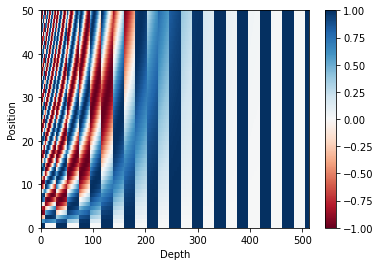

In [3]:
sample_pos_encoding = PositionalEncoding(50, 512)   # [[YOUR CODE]]

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

Q. ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ 256Ïù¥Í≥† ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 30Ïù∏ ÌÖçÏä§Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Íµ¨ÌòÑÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå, Ï†ÅÏ†àÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Î•º Ï∂îÏ∏°Ìï¥Î≥¥Í≥† ÏúÑÏóê Íµ¨ÌòÑÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©Ìï¥ ÌëúÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.   
ÏúÑÏùò ÏΩîÎìúÏóêÏÑú 50, 512 ÎåÄÏã† 30, 256ÏùÑ ÏûÖÎ†•ÏúºÎ°ú ÌïòÏó¨ ÌñâÎ†¨ÏùÑ ÎßåÎì§Î©¥ Ï†ïÎãµÏûÖÎãàÎã§. Ï¶â PositionalEncoding(30,256)Î°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

# 9-5. Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò
ÏïûÏÑú Ïñ¥ÌÖêÏÖòÏù¥ Îã®Ïñ¥Îì§ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î©îÏª§ÎãàÏ¶òÏù¥ÎùºÍ≥† ÌñàÏóàÏ£†?
Í∑∏Î†áÎã§Î©¥ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î∞©Î≤ïÏù¥ ÏûàÏùÑ Í≤ÅÎãàÎã§.
Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑúÎäî Ïñ¥ÌÖêÏÖò Í∞íÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÏàòÏãùÏùÑ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.   
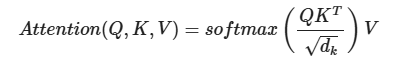  

Q, K, VÎäî Í∞ÅÍ∞Å ÏøºÎ¶¨(Query), ÌÇ§(Key), Í∞í(Value)Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
ÏïûÏÑú Ïñ∏Í∏âÌñàÎçò Ïñ¥ÌÖêÏÖò Ìï®ÏàòÏùò Ï†ïÏùòÏôÄ Í≤∞Í¥èÍ∞íÏùÑ Îã§Ïãú ÏÉÅÍ∏∞Ìï¥Î¥ÖÏãúÎã§.

Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎäî Ï£ºÏñ¥ÏßÑ 'ÏøºÎ¶¨(Query)'Ïóê ÎåÄÌï¥ÏÑú Î™®Îì† 'ÌÇ§(Key)'ÏôÄÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í∞ÅÍ∞Å Íµ¨Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† Íµ¨Ìï¥ÎÇ∏ Ïù¥ Ïú†ÏÇ¨ÎèÑÎ•º ÌÇ§ÏôÄ ÎßµÌïëÎêòÏñ¥ÏûàÎäî Í∞ÅÍ∞ÅÏùò 'Í∞í(Value)'Ïóê Î∞òÏòÅÌï¥ Ï§çÎãàÎã§. Í∑∏Î¶¨Í≥† Ïú†ÏÇ¨ÎèÑÍ∞Ä Î∞òÏòÅÎêú 'Í∞í(Value)'ÏùÑ Î™®Îëê ÎçîÌï¥ÏÑú Î≠âÏ≥êÏ£ºÎ©¥ Ïù¥Î•º ÏµúÏ¢Ö Í≤∞Í≥ºÏù∏ Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) ÎùºÍ≥† Ìï©ÎãàÎã§.   

ÏúÑ Ï†ïÏùòÏôÄ ÏïÑÎûò ÎÇ¥Ïö© ÏÑ∏ Í∞ÄÏßÄÎßå Í∏∞ÏñµÌïòÎ©¥ ÏàòÏãùÏùÑ Í∑∏Î¶ºÏúºÎ°ú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

1. Q, K, VÎäî Îã®Ïñ¥ Î≤°ÌÑ∞Î•º ÌñâÏúºÎ°ú ÌïòÎäî Î¨∏Ïû• ÌñâÎ†¨Ïù¥Îã§.    
2. Î≤°ÌÑ∞Ïùò ÎÇ¥Ï†Å(dot product) ÏùÄ Î≤°ÌÑ∞Ïùò Ïú†ÏÇ¨ÎèÑÎ•º ÏùòÎØ∏ÌïúÎã§.   
3. ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÄ Í∞íÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌïòÎäî Ïä§ÏºÄÏùºÎßÅ(Scaling)ÏùÑ ÏúÑÌï®Ïù¥Îã§.   
Ïö∞ÏÑ† QÏôÄ KÏùò Ï†ÑÏπò ÌñâÎ†¨ÏùÑ Í≥±ÌïòÎäî Í≤ÉÏùÑ Í∑∏Î¶ºÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   

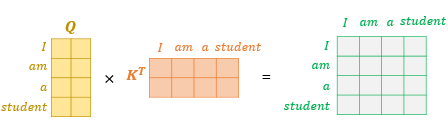   
Î¨∏Ïû• ÌñâÎ†¨ QÏôÄ Î¨∏Ïû• ÌñâÎ†¨ KÎ•º Í≥±ÌïòÎ©¥ ÏúÑÏùò Í∑∏Î¶ºÍ≥º Í∞ôÏùÄ Ï¥àÎ°ùÏÉâ ÌñâÎ†¨ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.   

ÏúÑ Ï¥àÎ°ùÏÉâ ÌñâÎ†¨Ïù¥ ÏùòÎØ∏ÌïòÎäî Í∞íÏùÄ Î¨¥ÏóáÏùºÍπåÏöî? ÏòàÎ•º Îì§Ïñ¥ 'am' ÌñâÍ≥º 'student' Ïó¥Ïùò Í∞íÏùÄ Q ÌñâÎ†¨Ïóê ÏûàÎçò 'am' Î≤°ÌÑ∞ÏôÄ K ÌñâÎ†¨Ïóê ÏûàÎçò 'student Î≤°ÌÑ∞'Ïùò ÎÇ¥Ï†ÅÍ∞íÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Í≤∞Íµ≠ Í∞Å Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò Ïú†ÏÇ¨ÎèÑÍ∞Ä Î™®Îëê Í∏∞Î°ùÎêú Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨Ïù¥ ÎêòÎäî Í≤ÉÏù¥ÏßÄÏöî!   
Ïù¥ Ïú†ÏÇ¨ÎèÑ Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅ Ìï¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú ÌñâÎ†¨ Ï†ÑÏ≤¥Î•º ÌäπÏ†ï Í∞íÏúºÎ°ú ÎÇòÎà†Ï£ºÍ≥†, Ïú†ÏÇ¨ÎèÑÎ•º 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú NormalizeÌï¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïó¨Í∏∞ÍπåÏßÄÍ∞Ä QÏôÄ KÏùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Í≥ºÏ†ïÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÍ≤†ÏäµÎãàÎã§. Ïó¨Í∏∞Ïóê Î¨∏Ïû• ÌñâÎ†¨ VÏôÄ Í≥±ÌïòÎ©¥ Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) Î•º ÏñªÏäµÎãàÎã§.   

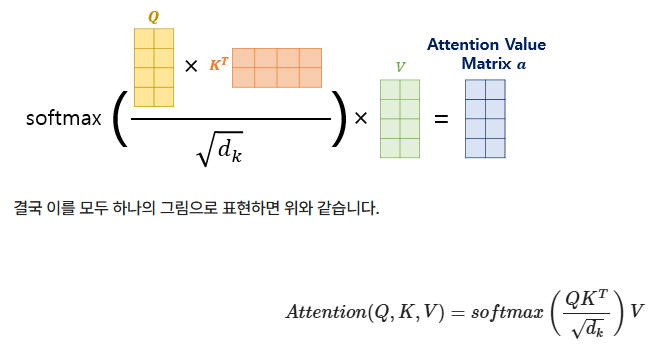   
Ïù¥ ÏàòÏãùÏùÄ ÎÇ¥Ï†Å(dot product)ÏùÑ ÌÜµÌï¥ Îã®Ïñ¥ Î≤°ÌÑ∞ Í∞Ñ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨Ìïú ÌõÑÏóê, ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÎÇòÎà†Ï£ºÎäî Î∞©ÏãùÏúºÎ°ú QÏôÄ KÏùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÏòÄÎã§Í≥† ÌïòÏó¨ Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò(Scaled Dot Product Attention) Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§. Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î∞©Î≤ïÏù¥ Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏(scaled dot product)ÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Ïù¥Î¶ÑÏù¥ Î∂ôÏùÄ Í≤ÉÏù¥ÏßÄÏöî.   

ÎßåÏïΩÏóê Î∂ÑÎ™®Ïóê ÌäπÏ†ï Í∞íÏùÑ ÎÇòÎà†Ï£ºÎäî Î∂ÄÎ∂ÑÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÎã§Î©¥ Ïñ¥ÌÖêÏÖòÏùò Ïù¥Î¶ÑÏùÄ Î¨¥ÏóáÏùºÍπåÏöî? Í∑∏ Ïñ¥ÌÖêÏÖòÏùÄ ÎãπÏó∞Ìûà Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò(dot product attention) Ïù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.   

Q. ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÏÇ¨Ïö©ÌïòÏó¨ Ïä§ÏºÄÏùºÎßÅ(Scaling)ÏùÑ ÌïòÎäî Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?   
Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÏßÄ ÏïäÏúºÎ©¥ Î≤°ÌÑ∞Ïùò ÎÇ¥Ï†Å(dot product) Ïó∞ÏÇ∞Ïùò Í≤∞Í≥ºÍ∞Ä ÏûÖÎ†• Î≤°ÌÑ∞Ïùò Ï∞®Ïõê ÏàòÏóê Îî∞Îùº ÌÅ¨Í∏∞Í∞Ä Îß§Ïö∞ Ïª§ÏßÄÍ≤å ÎêòÍ≥†, softmaxÏùò Ï∂úÎ†•Í∞íÏù¥ ÏûëÏïÑÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏûÖÎãàÎã§. softmaxÏùò Ï∂úÎ†•Í∞íÏù¥ ÏûëÏïÑÏßÄÎ©¥ Ïó≠Ï†ÑÌåå Í≥ºÏ†ïÏóêÏÑú Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.   

### Íµ¨ÌòÑÌïòÍ∏∞
Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥Î¥ÖÏãúÎã§.

In [4]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
  # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
  if mask is not None:
    logits += (mask * -1e9)

  # softmaxÏ†ÅÏö©
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  output = tf.matmul(attention_weights, value)
  return output

print("Ïäù=3")

Ïäù=3


Ïù¥ Í∏ÄÏóêÏÑú ÏïûÏúºÎ°ú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïúÎã§Í≥† ÌïúÎã§Î©¥, Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖòÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§!

# 9-6. Î®∏Î¶¨Í∞Ä Ïó¨Îü¨ Í∞úÏù∏ Ïñ¥ÌÖêÏÖò
### Î≥ëÎ†¨Î°ú Ïñ¥ÌÖêÏÖò ÏàòÌñâÌïòÍ∏∞
Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑú num_headsÎùºÎäî Î≥ÄÏàòÎäî Í∏∞Í≥ÑÍ∞Ä Î™á Í∞úÏùò ÎòëÎòëÌïú Î®∏Î¶¨Î•º ÏÇ¨Ïö©Ìï†ÏßÄ, Îã§Ïãú ÎßêÌï¥ Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Î™á Í∞úÏùò Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌï†ÏßÄÎ•º Í≤∞Ï†ïÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§.  
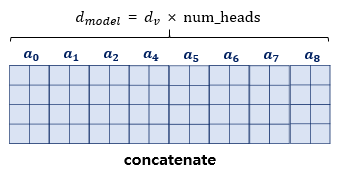   

ÏïûÏÑú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©ÏóêÏÑú d_modelÏùÄ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ÎùºÍ≥† Ïñ∏Í∏âÌïú Î∞î ÏûàÏäµÎãàÎã§. Í≤∞Íµ≠ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ï¥àÍ∏∞ ÏûÖÎ†•Ïù∏ Î¨∏Ïû• ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Îäî Î¨∏Ïû•Ïùò Í∏∏Ïù¥Î•º ÌñâÏúºÎ°ú, d_modelÏùÑ Ïó¥Ïùò ÌÅ¨Í∏∞Î°ú Í∞ÄÏßëÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Ïù¥Î†áÍ≤å ÏûÖÎ†•Îêú Î¨∏Ïû• ÌñâÎ†¨ÏùÑ num_headsÏùò ÏàòÎßåÌÅº Ï™ºÍ∞úÏÑú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÍ≥†, Ïù¥Î†áÍ≤å ÏñªÏùÄ num_headsÏùò Í∞úÏàòÎßåÌÅºÏùò Ïñ¥ÌÖêÏÖò Í∞í ÌñâÎ†¨ÏùÑ Îã§Ïãú ÌïòÎÇòÎ°ú concatenateÌï©ÎãàÎã§.

ÏúÑÏùò Í∑∏Î¶ºÏùÄ num_headsÍ∞Ä 8Í∞úÏù∏ Í≤ΩÏö∞Ïù∏Îç∞, Îã§Ïãú concatenateÌïòÎ©¥ÏÑú Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä d_modelÏù¥ Îê©ÎãàÎã§.

Í∞ÅÏûê Î¨∏Ï†úÏßÄÎ•º ÎÇòÎà†ÏÑú Ìëº ÌõÑÏóê ÎßàÏßÄÎßâÏóê Îã§Ïãú Í≤∞Í≥ºÎ•º Ìï©ÏπúÎã§Í≥† ÎπÑÏú†Ìï¥Î≥º ÏàòÎèÑ ÏûàÍ≤†ÎÑ§Ïöî!

Q. ÎÖºÎ¨∏ÏóêÏÑú d_modelÏùÄ 512Ïùò Í∞íÏùÑ Í∞ÄÏ°åÎã§Í≥† ÌïòÍ≥†, num_headsÎäî 8Ïùò Í∞íÏùÑ Í∞ÄÏ°åÎã§Í≥† Ìï¥Ïöî. Í∑∏Î†áÎã§Î©¥, Ïó∞Í≤∞ÌïòÍ∏∞ Ï†Ñ 8Í∞úÏùò Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) ÌñâÎ†¨Ïùò Ïó¥Ïùò ÌÅ¨Í∏∞Îäî Î™á Ï∞®ÏõêÏù¥ÏóàÏùÑÍπåÏöî?   
512/8 = 64   


### Î©ÄÌã∞-Ìó§Îìú Ïñ¥ÌÖêÏÖò
Ïù¥Î†áÍ≤å Î≥ëÎ†¨Î°ú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÎ©¥ ÏñªÏùÑ Ïàò ÏûàÎäî Ìö®Í≥ºÎäî Î¨¥ÏóáÏùºÍπåÏöî?   

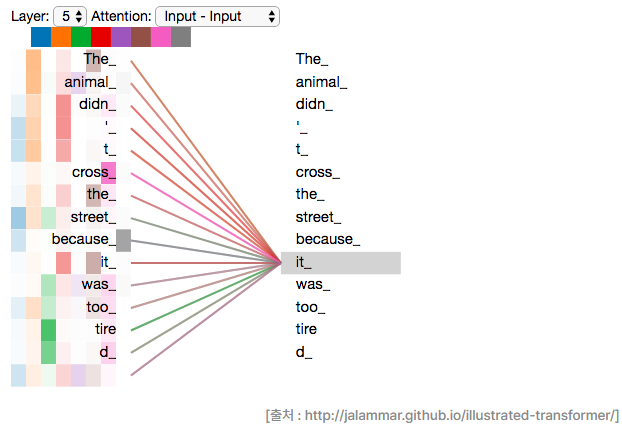   
ÏúÑ Í∑∏Î¶ºÏùÄ num_headsÏùò Í∞íÏù¥ 8Ïùº Îïå, Î≥ëÎ†¨Î°ú ÏàòÌñâÎêòÎäî Ïñ¥ÌÖêÏÖòÏù¥ ÏÑúÎ°ú Îã§Î•∏ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Îã§Ïãú ÎßêÌï¥ 8Í∞úÏùò Î®∏Î¶¨Îäî Í∞ÅÍ∞Å Îã§Î•∏ Í¥ÄÏ†êÏóêÏÑú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÎØÄÎ°ú Ìïú Î≤àÏùò Ïñ¥ÌÖêÏÖòÎßå ÏàòÌñâÌñàÎã§Î©¥ ÎÜìÏπ† ÏàòÎèÑ ÏûàÎçò Ï†ïÎ≥¥Î•º Ï∫êÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ ÏúÑ Í∑∏Î¶ºÏóêÏÑúÎùºÎ©¥ it_Ïù¥ÎùºÎäî ÌÜ†ÌÅ∞Ïù¥ animal_Í≥º Ïú†ÏÇ¨ÌïòÎã§Í≥† Î≥¥Îäî Í¥ÄÏ†êÍ≥º street_Í≥º Ïú†ÏÇ¨ÌïòÎã§Í≥† Î≥¥Îäî Í¥ÄÏ†êÏù¥ ÌïúÍ∫ºÎ≤àÏóê Î™®Îëê ÌëúÌòÑ Í∞ÄÎä•ÌïòÎã§Îäî ÎúªÏûÖÎãàÎã§.

Ïù¥ÏôÄ Í∞ôÏù¥ Ïñ¥ÌÖêÏÖòÏùÑ Î≥ëÎ†¨Î°ú ÏàòÌñâÌïòÎäî Í≤ÉÏùÑ Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.   

### Íµ¨ÌòÑÌïòÍ∏∞
Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùÑ Íµ¨ÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   
ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°úÎäî Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.   
Q. Ï£ºÏÑùÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú ÎÇòÎ®∏ÏßÄ ÏΩîÎìúÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.

In [5]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
    query = self.query_dense(query) # [[YOUR CODE]]
    key = self.key_dense(key) # [[YOUR CODE]]
    value = self.value_dense(value) # [[YOUR CODE]]

    # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§
    query = self.split_heads(query, batch_size) # [[YOUR CODE]]
    key = self.split_heads(key, batch_size) # [[YOUR CODE]]
    value = self.split_heads(value, batch_size) # [[YOUR CODE]]

    # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
    outputs = self.dense(concat_attention)

    return outputs
print("Ïäù=3")

Ïäù=3


# 9-7. ÎßàÏä§ÌÇπ
ÎßàÏä§ÌÇπ(Masking) Ïù¥ÎûÄ, ÌäπÏ†ï Í∞íÎì§ÏùÑ Í∞ÄÎ†§ÏÑú Ïã§Ï†ú Ïó∞ÏÇ∞Ïóê Î∞©Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑúÎäî Ïñ¥ÌÖêÏÖòÏùÑ ÏúÑÌï¥ÏÑú ÌÅ¨Í≤å Îëê Í∞ÄÏßÄ ÎßàÏä§ÌÇπÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïòÎäîÎç∞Ïöî.

### Ìå®Îî© ÎßàÏä§ÌÇπ(Padding Masking)
Ï≤´ Î≤àÏß∏ ÎßàÏä§ÌÇπÏùÄ Ìå®Îî© ÌÜ†ÌÅ∞(Padding token)ÏùÑ Ïù¥Ïö©Ìïú Î∞©Î≤ïÏûÖÎãàÎã§.

ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ÏóêÏÑú Ìå®Îî©(Padding)Ïù¥ÎûÄ Ïñ¥Îñ§ Í∞úÎÖêÏùºÍπåÏöî?   
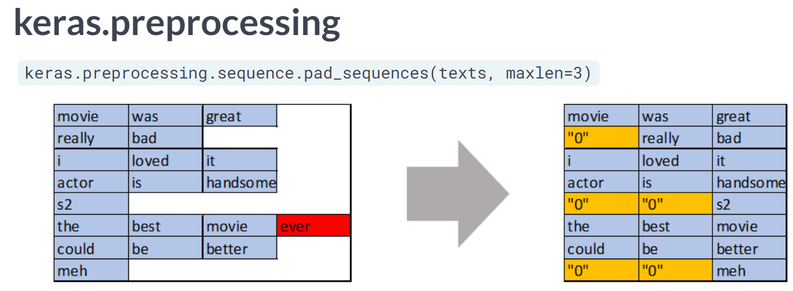   
Ìå®Îî©ÏùÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÏÑúÎ°ú Îã§Î•º Îïå, Î™®Îì† Î¨∏Ïû•Ïùò Í∏∏Ïù¥Î•º ÎèôÏùºÌïòÍ≤å Ìï¥Ï£ºÎäî Í≥ºÏ†ïÏóêÏÑú Ï†ïÌï¥Ï§Ä Í∏∏Ïù¥Î≥¥Îã§ ÏßßÏùÄ Î¨∏Ïû•Ïùò Í≤ΩÏö∞ÏóêÎäî Ïà´Ïûê 0ÏùÑ Ï±ÑÏõåÏÑú Î¨∏Ïû•Ïùò Í∏∏Ïù¥Î•º ÎßûÏ∂∞Ï£ºÎäî ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏûÖÎãàÎã§.

ÏúÑ Í∑∏Î¶ºÏùÄ ÏºÄÎùºÏä§Ïùò pad_sequences()Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ìå®Îî©ÏùÑ ÌïòÎäî Í≥ºÏ†ïÏùÑ ÏãúÍ∞ÅÌôîÌïú Í∑∏Î¶ºÏûÖÎãàÎã§.

Í∑∏Îü∞Îç∞ ÏÇ¨Ïã§ Ïù¥Î†áÍ≤å Ï£ºÏñ¥ÏßÑ Ïà´Ïûê 0ÏùÄ Ïã§Ï†ú ÏùòÎØ∏Í∞Ä ÏûàÎäî Îã®Ïñ¥Í∞Ä ÏïÑÎãàÎØÄÎ°ú Ïã§Ï†ú Ïñ¥ÌÖêÏÖò Îì±Í≥º Í∞ôÏùÄ Ïó∞ÏÇ∞ÏóêÏÑúÎäî Ï†úÏô∏Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. Ìå®Îî© ÎßàÏä§ÌÇπÏùÄ Ïù¥Î•º ÏúÑÌï¥ Ïà´Ïûê 0Ïù∏ ÏúÑÏπòÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

Îã§ÏùåÏùÄ Ìå®Îî© ÎßàÏä§ÌÇπÏùÑ Íµ¨ÌòÑÌïú Ìï®ÏàòÏûÖÎãàÎã§.   

In [6]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("Ïäù=3")

Ïäù=3


Ïù¥ Ìï®ÏàòÏóê Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÎ©¥, Ïù¥ Ìï®ÏàòÎäî Ïà´ÏûêÍ∞Ä 0Ïù∏ Î∂ÄÎ∂ÑÏùÑ Ï≤¥ÌÅ¨Ìïú Î≤°ÌÑ∞Î•º Î¶¨ÌÑ¥Ìï©ÎãàÎã§.

Îëê Í∞úÏùò Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÏûÖÎ†•ÏúºÎ°ú Ìï¥Î≥¥Í≥†, Í∞ÅÍ∞Å Ïñ¥Îñ§ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎäîÏßÄ Î≥¥Í≤†ÏäµÎãàÎã§.

In [7]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


Îëê Ï†ïÏàò ÏãúÌÄÄÏä§Ïóê ÎåÄÌï¥ÏÑú Í∞ÅÍ∞Å Í≤∞Í≥ºÍ∞Ä Ï∂úÎ†•ÎêòÎäîÎç∞, Ïò§ÏßÅ Ïà´ÏûêÍ∞Ä 0Ïù∏ ÏúÑÏπòÏóêÏÑúÎßå Ïà´Ïûê 1Ïù¥ ÎÇòÏò§Í≥† Ïà´Ïûê 0Ïù¥ ÏïÑÎãå ÏúÑÏπòÏóêÏÑúÎäî Ïà´Ïûê 0Ïù∏ Î≤°ÌÑ∞Î•º Ï∂úÎ†•Ìï©ÎãàÎã§.

Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÏãúÏóê Ìå®Îî© ÎßàÏä§ÌÇπÏùÑ Ï∞∏Í≥†ÌïòÎ©¥ Î∂àÌïÑÏöîÌïòÍ≤å Ïà´Ïûê 0ÏùÑ Ï∞∏Í≥†ÌïòÏßÄ ÏïäÍ≤å Ìï† Ïàò ÏûàÍ≤†Ï£†?

### Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπ(Look-ahead masking, Îã§Ïùå Îã®Ïñ¥ Í∞ÄÎ¶¨Í∏∞)
ÏàúÌôò Ïã†Í≤ΩÎßù, RNNÍ≥º Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Î¨∏Ïû•ÏùÑ ÏûÖÎ†•Î∞õÏùÑ Îïå ÏûÖÎ†•Î∞õÎäî Î∞©Î≤ïÏù¥ Ï†ÑÌòÄ Îã§Î¶ÖÎãàÎã§.

RNNÏùÄ stepÏù¥ÎùºÎäî Í∞úÎÖêÏù¥ Ï°¥Ïû¨Ìï¥ÏÑú Í∞Å stepÎßàÎã§ Îã®Ïñ¥Í∞Ä ÏàúÏÑúÎåÄÎ°ú ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî Íµ¨Ï°∞Ïù∏ Î∞òÎ©¥ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Í≤ΩÏö∞ÏóêÎäî Î¨∏Ïû• ÌñâÎ†¨ÏùÑ ÎßåÎì§Ïñ¥ Ìïú Î≤àÏóê ÌñâÎ†¨ ÌòïÌÉúÎ°ú ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÑÎã§Îäî ÌäπÏßïÏù¥ ÏûàÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† Ïù¥ ÌäπÏßï ÎïåÎ¨∏Ïóê Ï∂îÍ∞ÄÏ†ÅÏù∏ ÎßàÏä§ÌÇπ(Masking) ÏùÑ ÌïÑÏöîÌï©ÎãàÎã§.

#### RNN
RNNÏúºÎ°ú Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°Ìï¥Í∞ÄÎ©¥ÏÑú Î¨∏Ïû•ÏùÑ ÏÉùÏÑ±Ìï¥ÎÇ¥Îäî Í≥ºÏ†ïÏùÑ Î≥¥Í≤†ÏäµÎãàÎã§.

Îã§Ïãú ÎßêÌï¥ RNNÏúºÎ°ú ÎîîÏΩîÎçîÎ•º Íµ¨ÌòÑÌñàÏùÑ Í≤ΩÏö∞ÏûÖÎãàÎã§.   
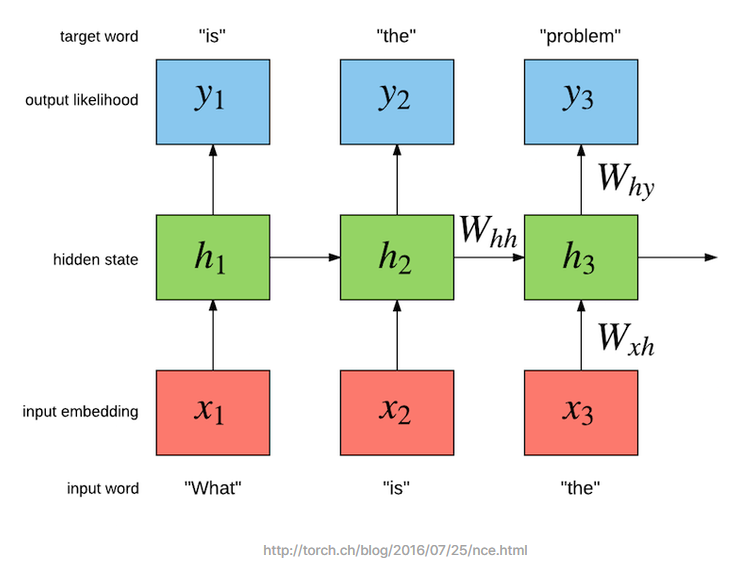   
RNNÏùÄ Íµ¨Ï°∞ÏÉÅÏúºÎ°ú Îã§Ïùå Îã®Ïñ¥Î•º ÎßåÎì§Ïñ¥ Í∞à Îïå, ÏûêÏã†Î≥¥Îã§ ÏïûÏóê ÏûàÎäî Îã®Ïñ¥Îì§Îßå Ï∞∏Í≥†Ìï¥ÏÑú Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°Ìï©ÎãàÎã§. ÏúÑÏùò Í∑∏Î¶ºÏùÑ Ï∞∏Í≥†Î°ú Í∞Å Îã®Í≥ÑÏóêÏÑú Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏° Í≥ºÏ†ïÏùÑ ÏÑúÏà†ÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

Ï≤´ Î≤àÏß∏ step
ÌòÑÏû¨ÍπåÏßÄÏùò ÏûÖÎ†• : what ‚Üí Ï∂úÎ†• : is

Îëê Î≤àÏß∏ step
ÌòÑÏû¨ÍπåÏßÄÏùò ÏûÖÎ†• : what is ‚Üí Ï∂úÎ†• : the

ÏÑ∏ Î≤àÏß∏ step
ÌòÑÏû¨ÍπåÏßÄÏùò ÏûÖÎ†• : what is the ‚Üí Ï∂úÎ†• problem

#### Ìä∏ÎûúÏä§Ìè¨Î®∏
ÌïòÏßÄÎßå Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Í≤ΩÏö∞, Ï†ÑÏ≤¥ Î¨∏Ïû•Ïù¥ Î¨∏Ïû• ÌñâÎ†¨Î°ú Îì§Ïñ¥Í∞ÄÍ∏∞ ÎïåÎ¨∏Ïóê ÏúÑÏπòÏôÄ ÏÉÅÍ¥ÄÏóÜÏù¥ Î™®Îì† Îã®Ïñ¥Î•º Ï∞∏Í≥†Ìï¥ÏÑú Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå ÏÇ¨Ïã§ Ïö∞Î¶¨Í∞Ä ÏõêÌïòÎäî Í≤ÉÏùÄ Ïù¥Ï†Ñ Îã®Ïñ¥Îì§Î°úÎ∂ÄÌÑ∞ Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïòÎäî ÌõàÎ†®ÏùÑ Ï†úÎåÄÎ°ú ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ ÏûêÏã†Î≥¥Îã§ Îã§ÏùåÏóê ÎÇòÏò¨ Îã®Ïñ¥Î•º Ï∞∏Í≥†ÌïòÏßÄ ÏïäÎèÑÎ°ù Í∞ÄÎ¶¨Îäî Í∏∞Î≤ïÏù¥ Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπ Í∏∞Î≤ïÏûÖÎãàÎã§.

Ïù¥ Í∏∞Î≤ïÏùÄ Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌï† Îïå, Query Îã®Ïñ¥ Îí§Ïóê ÎÇòÏò§Îäî Key Îã®Ïñ¥Îì§Ïóê ÎåÄÌï¥ÏÑúÎäî ÎßàÏä§ÌÇπ Ìï©ÎãàÎã§.   
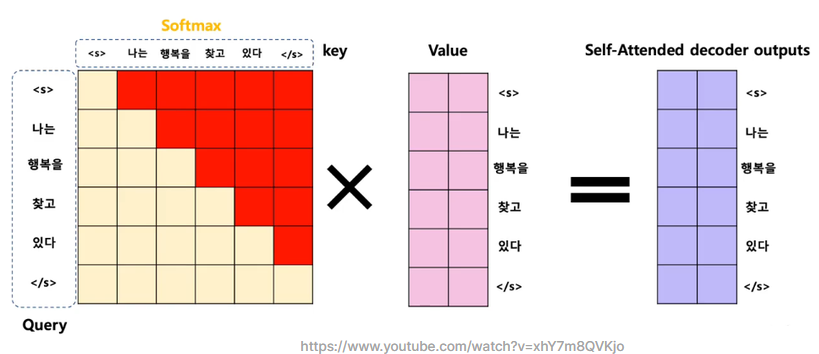   
ÏúÑÏùò Í∑∏Î¶ºÏóêÏÑú Îπ®Í∞ÑÏÉâÏúºÎ°ú ÏÉâÏπ†Îêú Î∂ÄÎ∂ÑÏùÄ ÎßàÏä§ÌÇπÏùÑ ÌëúÌòÑÌïòÍ≥† ÏûàÏäµÎãàÎã§. Îπ®Í∞ÑÏÉâÏùÄ Ïã§Ï†ú Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ÏóêÏÑú Í∞ÄÎ¶¨Îäî Ïó≠Ìï†ÏùÑ ÌïòÏó¨ Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÏãúÏóê ÌòÑÏû¨ Îã®Ïñ¥Î•º Í∏∞Ï§ÄÏúºÎ°ú Ïù¥Ï†Ñ Îã®Ïñ¥Îì§ÌïòÍ≥†Îßå Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌñâÏùÑ Query, Ïó¥ÏùÑ KeyÎ°ú ÌëúÌòÑÎêú ÌñâÎ†¨ÏûÑÏùÑ Í∞êÏïàÌïòÍ≥† Ï≤úÏ≤úÌûà ÌñâÎ†¨ÏùÑ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

ÏòàÎ•º Îì§Ïñ¥ Query Îã®Ïñ¥Í∞Ä 'Ï∞æÍ≥†'ÎùºÍ≥† ÌïúÎã§Î©¥, Ïù¥ 'Ï∞æÍ≥†'ÎùºÎäî ÌñâÏóêÎäî <s>, <ÎÇòÎäî>, <ÌñâÎ≥µÏùÑ>, <Ï∞æÍ≥†>ÍπåÏßÄÏùò Ïó¥Îßå Î≥¥Ïù¥Í≥† Í∑∏ Îí§ Ïó¥ÏùÄ ÏïÑÏòà Îπ®Í∞ÑÏÉâÏúºÎ°ú Ïπ†Ìï¥Ï†∏ ÏûàÏäµÎãàÎã§.   
Ï¶â, Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨Ìï† Ïàò ÏóÜÎèÑÎ°ù Ìï¥ÎÜìÏïòÏäµÎãàÎã§. Ï†Ä Îπ®Í∞ÑÏÉâ Î∂ÄÎ∂ÑÏùÑ ÎßàÏä§ÌÇπ Ìï®ÏàòÎ°ú Íµ¨ÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   

In [8]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("Ïäù=3")

Ïäù=3


In [9]:
# ÏßÅÏ†ë ÏûÖÎ†•ÏùÑ ÎÑ£Ïñ¥ ÌÖåÏä§Ìä∏Ìï¥ Î¥ÖÏãúÎã§.
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


Ïà´Ïûê 0Ïù¥ Ìè¨Ìï®ÎêòÏóàÏùÑ Í≤ΩÏö∞ÏóêÎèÑ ÌÖåÏä§Ìä∏Ìï¥ Î¥ÖÏãúÎã§.

In [10]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


# 9-8. Ïù∏ÏΩîÎçî
Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÏûÖÎ†•, Í∑∏Î¶¨Í≥† Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏùºÏñ¥ÎÇòÎäî Ïñ¥ÌÖêÏÖòÏóê ÎåÄÌï¥ÏÑúÎèÑ Í∞ÑÎã®Ìûà Ï†ïÎ¶¨Ìï¥Î¥§ÏäµÎãàÎã§. Ïù¥Ï†ú Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ïù∏ÏΩîÎçîÎ•º ÏÑ§Í≥ÑÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

### Ïù∏ÏΩîÎçî Ï∏µ ÎßåÎì§Í∏∞
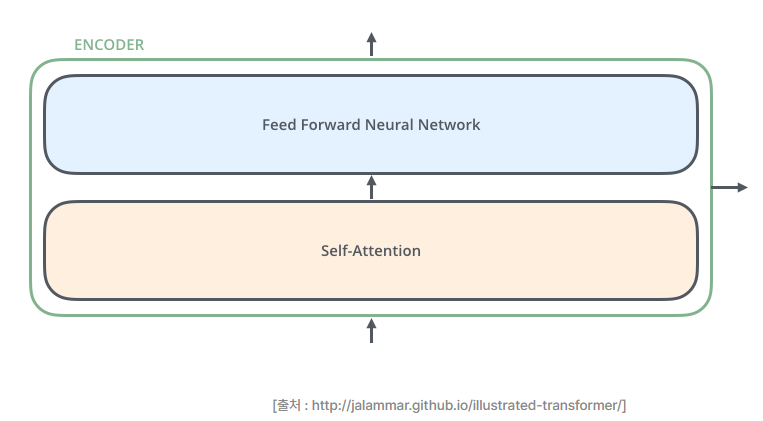   
ÌïòÎÇòÏùò Ïù∏ÏΩîÎçî Ï∏µÏùÄ ÌÅ¨Í≤å Ï¥ù 2Í∞úÏùò ÏÑúÎ∏å Ï∏µ(sublayer)ÏúºÎ°ú ÎÇòÎàÑÏñ¥ÏßëÎãàÎã§.
Î∞îÎ°ú ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏûÖÎãàÎã§. ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÄ Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏúºÎ°ú Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßëÎãàÎã§.

Îëê Í∞úÏùò ÏÑúÎ∏å Ï∏µÏùÑ Í∞ÄÏßÄÎäî ÌïòÎÇòÏùò Ïù∏ÏΩîÎçî Ï∏µÏùÑ Íµ¨ÌòÑÌïòÎäî Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§. Ìï®Ïàò ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Ï∏µÍ≥º Îëê Î≤àÏß∏ ÏÑúÎ∏å Ï∏µÏùÑ Íµ¨ÌòÑÌïòÍ≥† ÏûàÏäµÎãàÎã§.   

In [11]:
# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


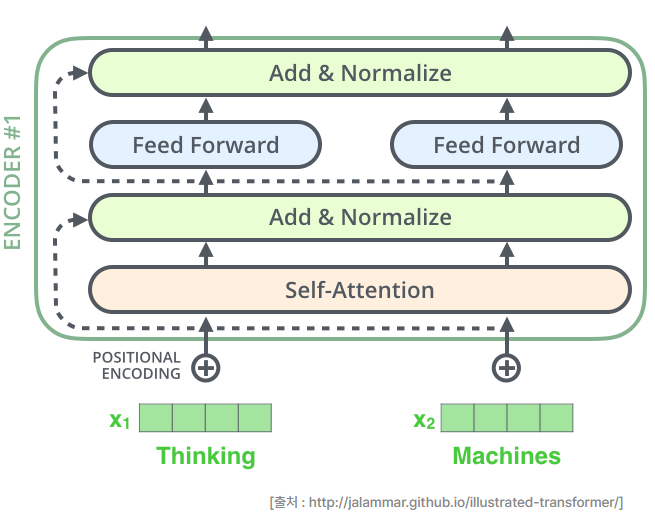  

### Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏåìÏïÑ Ïù∏ÏΩîÎçî ÎßåÎì§Í∏∞
Ïù¥Î†áÍ≤å Íµ¨ÌòÑÌïú Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏûÑÎ≤†Îî© Ï∏µ(Embedding layer) Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(Positional Encoding) ÏùÑ Ïó∞Í≤∞ÌïòÍ≥†, ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî ÎßåÌÅº Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏåìÏùåÏúºÎ°úÏç® Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ïù∏ÏΩîÎçîÍ∞Ä ÏôÑÏÑ±Îê©ÎãàÎã§.

Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏóêÏÑúÎäî Í∞Å ÏÑúÎ∏å Ï∏µ Ïù¥ÌõÑÏóê ÌõàÎ†®ÏùÑ ÎèïÎäî Layer NormalizationÏù¥ÎùºÎäî ÌÖåÌÅ¨ÎãâÏù¥ ÏÇ¨Ïö©ÎêòÏóàÏäµÎãàÎã§. ÏúÑ Í∑∏Î¶ºÏóêÏÑúÎäî NormalizeÎùºÍ≥† ÌëúÏãúÎêú Î∂ÄÎ∂ÑÏóê Ìï¥ÎãπÎê©ÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïù∏ num_layers Í∞úÏàòÏùò Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏåìÏäµÎãàÎã§. ÎÖºÎ¨∏ÏóêÏÑúÎäî Ï¥ù 6Í∞úÏùò Ïù∏ÏΩîÎçî Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏßÄÎßå, Ïã§ÏäµÏóêÏÑúÎäî ÌïôÏäµ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ Í∑∏Î≥¥Îã§ Ï†ÅÏùÄ Í∞úÏàòÎ•º ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.

In [12]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


# 9-9. ÎîîÏΩîÎçî
ÎîîÏΩîÎçîÎäî Ïù∏ÏΩîÎçîÏôÄ ÎπÑÏä∑ÌïòÏßÄÎßå, Ïù∏ÏΩîÎçîÎ≥¥Îã§ Ï°∞Í∏à Îçî Î≥µÏû°Ìï©ÎãàÎã§. Ïù∏ÏΩîÎçîÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Ï∏µÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏßÄÎßå, ÎîîÏΩîÎçîÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Ï∏µÏúºÎ°ú Íµ¨ÏÑ±ÎêúÎã§Îäî Ï†êÏù¥ Îã§Î¶ÖÎãàÎã§.   
### ÎîîÏΩîÎçî Ï∏µ
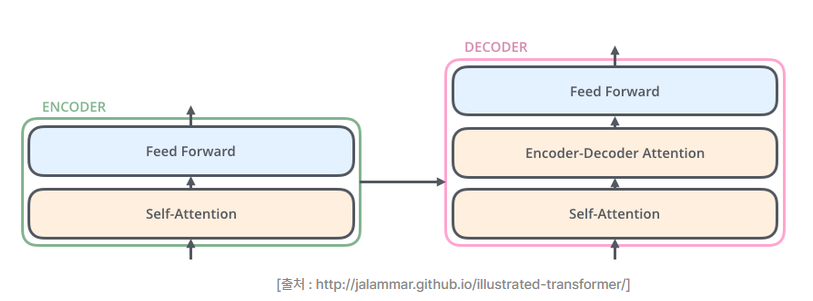   
Ï≤´ Î≤àÏß∏Îäî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò, Îëê Î≤àÏß∏Îäî Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò, ÏÑ∏ Î≤àÏß∏Îäî ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏûÖÎãàÎã§. Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖòÏùÄ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥ºÎäî Îã¨Î¶¨, QueryÍ∞Ä ÎîîÏΩîÎçîÏùò Î≤°ÌÑ∞Ïù∏ Î∞òÎ©¥Ïóê KeyÏôÄ ValueÍ∞Ä Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞ÎùºÎäî ÌäπÏßïÏù¥ ÏûàÏäµÎãàÎã§. Ïù¥ Î∂ÄÎ∂ÑÏù¥ Ïù∏ÏΩîÎçîÍ∞Ä ÏûÖÎ†• Î¨∏Ïû•ÏúºÎ°úÎ∂ÄÌÑ∞ Ï†ïÎ≥¥Î•º ÎîîÏΩîÎçîÏóê Ï†ÑÎã¨ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.   
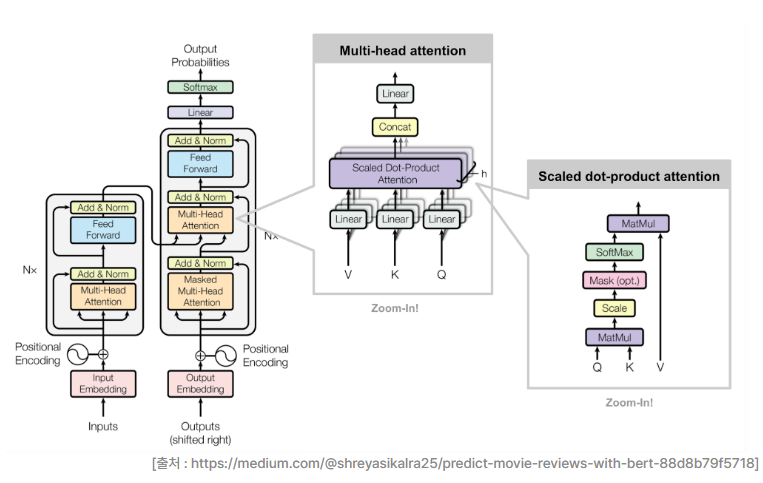   
Ïù∏ÏΩîÎçîÏùò ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÎîîÏΩîÎçîÏùò ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò, Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò Îëê Í∞úÏùò Ïñ¥ÌÖêÏÖò Î™®Îëê Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖòÏùÑ Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏúºÎ°ú Î≥ëÎ†¨Ï†ÅÏúºÎ°ú ÏàòÌñâÌï©ÎãàÎã§.

ÎîîÏΩîÎçîÏùò ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Ï∏µÏùÑ ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Íµ¨ÌòÑÌïú ÎîîÏΩîÎçîÏùò Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   

In [13]:
# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
  # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


### ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏïÑ ÎîîÏΩîÎçî ÎßåÎì§Í∏∞
Ïù¥Î†áÍ≤å Íµ¨ÌòÑÌïú ÎîîÏΩîÎçîÏùò Ï∏µÏùÄ ÏûÑÎ≤†Îî© Ï∏µ(Embedding layer) Í≥º Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©(Positional Encoding) ÏùÑ Ïó∞Í≤∞ÌïòÍ≥†, ÏÇ¨Ïö©ÏûêÍ∞Ä ÏõêÌïòÎäî ÎßåÌÅº ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏïÑ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÎîîÏΩîÎçîÍ∞Ä ÏôÑÏÑ±Îê©ÎãàÎã§.

Ïù∏ÏΩîÎçîÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú num_layers Í∞úÏàòÏùò ÎîîÏΩîÎçî Ï∏µÏùÑ ÏåìÏäµÎãàÎã§. ÎÖºÎ¨∏ÏóêÏÑúÎäî Ï¥ù 6Í∞úÏùò ÎîîÏΩîÎçî Ï∏µÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏßÄÎßå, Ïã§ÏäµÏóêÏÑúÎäî ÌïôÏäµ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ Í∑∏Î≥¥Îã§ Ï†ÅÏùÄ Í∞úÏàòÎ•º ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.

In [14]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # Ìå®Îî© ÎßàÏä§ÌÅ¨
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


Ïù¥Ï†ú Ïù∏ÏΩîÎçî Ï∏µÍ≥º ÎîîÏΩîÎçî Ï∏µÏùÑ Í∞ÅÍ∞Å Ìï®ÏàòÎ°ú Íµ¨ÌòÑÌïòÏòÄÏäµÎãàÎã§.

Ïù¥Î•º ÌïòÎÇòÎ°ú Ï°∞Ìï©ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÏùÑ ÌÖêÎç∞, Ïö∞ÏÑ† Í∑∏Ï†ÑÏóê Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Ìï† Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†, Ï†ÑÏ≤òÎ¶¨Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

# 9-10. Ï±óÎ¥áÏùò Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ Î∞õÏïÑÏò§Í∏∞
Ïó¨Í∏∞ÏÑúÎäî Cornell Movie-Dialogs CorpusÎùºÎäî ÏòÅÌôî Î∞è TV ÌîÑÎ°úÍ∑∏Îû®ÏóêÏÑú ÏÇ¨Ïö©ÎêòÏóàÎçò ÎåÄÌôîÏùò ÏåçÏúºÎ°ú Íµ¨ÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÎåÄÌôîÏùò ÏåçÏù¥ÎùºÍ≥† ÌïòÎäî Í≤ÉÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î®ºÏ†Ä ÎßêÌïòÎäî ÏÇ¨ÎûåÏùò ÎåÄÌôî Î¨∏Ïû•Ïù¥ ÏûàÍ≥†, Í∑∏Ïóê ÏùëÎãµÌïòÎäî ÎåÄÌôî Î¨∏Ïû•Ïùò ÏåçÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßëÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑÏò§Îäî Ïù¥Î≤à Ïä§ÌÖùÏóêÏÑú Î™©ÌëúÎ°ú ÌïòÎäî Í≤ÉÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

1. Ï†ïÌï¥ÏßÑ Í∞úÏàòÏù∏ 50,000Í∞úÏùò ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ Ï∂îÏ∂úÌïúÎã§.
2. Î¨∏Ïû•ÏóêÏÑú Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. ÏïåÌååÎ≤≥Í≥º ! ? , . Ïù¥ 4Í∞úÏùò Íµ¨ÎëêÏ†êÏùÑ Ï†úÏô∏ÌïòÍ≥† Îã§Î•∏ ÌäπÏàòÎ¨∏ÏûêÎäî Î™®Îëê Ï†úÍ±∞ÌïúÎã§.  

Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [15]:
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
print("Ïäù=3")

Ïäù=3


Ïó¨Í∏∞ÏÑú Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îäî Ïã§Ïäµ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë ÏùºÎ∂ÄÏûÖÎãàÎã§. Ïö∞ÏÑ†, Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú 5Îßå Í∞úÎßå Í∞ÄÏ†∏Ïò§ÎèÑÎ°ù ÌïòÍ≥† ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùò ÌòïÌÉúÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ÄÍ≥µÌï©ÎãàÎã§.

In [16]:
# ÏÇ¨Ïö©Ìï† ÏÉòÌîåÏùò ÏµúÎåÄ Í∞úÏàò
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


Ïù¥Î•º ÏúÑÌïú Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

Ïù¥Î≤à Ï†ÑÏ≤òÎ¶¨Îäî Ï†ïÍ∑ú ÌëúÌòÑÏãù(Regular Expression) ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Íµ¨ÎëêÏ†ê(punctuation) ÏùÑ Ï†úÍ±∞ÌïòÏó¨ Îã®Ïñ¥Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï(tokenizing) ÌïòÎäî ÏùºÏóê Î∞©Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎèÑÎ°ù Ï†ïÏ†úÌïòÎäî Í≤ÉÏùÑ Î™©ÌëúÎ°ú Ìï©ÎãàÎã§.

Q.Ï£ºÏÑùÏùÑ Ï∞∏Í≥†Ìï¥ÏÑú Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Ìï®ÏàòÎ•º ÏôÑÏÑ±ÌïòÏÑ∏Ïöî.

In [17]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
  # ÏûÖÎ†•Î∞õÏùÄ sentenceÎ•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
  sentence = sentence.lower().strip() # [[YOUR CODE]]

  # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
  # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # [[YOUR CODE]]
  sentence = sentence.strip()
  return sentence
print("Ïäù=3")

Ïäù=3


Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî ÎèôÏãúÏóê Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.

In [18]:
# ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
      # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏Ïóê Ìï¥ÎãπÎêòÎäî inputsÏôÄ ÎãµÎ≥ÄÏóê Ìï¥ÎãπÎêòÎäî outputsÏóê Ï†ÅÏö©.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("Ïäù=3")

Ïäù=3


Ïù¥Î†áÍ≤å Î°úÎìúÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÏÉòÌîå ÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥ºÍπåÏöî?

In [19]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
questions, answers = load_conversations()
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 50000
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 50000


ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùÄ Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Íµ¨ÏÑ±ÎêòÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÎØÄÎ°ú Îëê ÏÉòÌîå ÏàòÎäî Ï†ïÌôïÌïòÍ≤å ÏùºÏπòÌï¥Ïïº Ìï©ÎãàÎã§.

Îëò Îã§ 5Îßå Í∞úÏùò ÏÉòÌîåÏù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.

ÏûÑÏùòÎ°ú 22Î≤àÏß∏ ÏÉòÌîå(Ïù∏Îç±Ïä§ ÏÉÅÏúºÎ°úÎäî 21Î≤à ÏÉòÌîå)ÏùÑ Ï∂úÎ†•Ìï¥ÏÑú ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏù¥ Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Ïûò Ï†ÄÏû•ÏùÄ ÎêòÏóàÎäîÏßÄ, Í∑∏Î¶¨Í≥† Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÏóêÏÑú ÏùòÎèÑÌñàÎçò Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏßÑÌñâÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§!

In [20]:
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(questions[21]))
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(answers[21]))

Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: she s not a . . .
Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: lesbian ? no . i found a picture of jared leto in one of her drawers , so i m pretty sure she s not harboring same sex tendencies .


?ÎÇò .Í≥º Í∞ôÏùÄ Íµ¨ÎëêÏ†êÎì§Ïù¥ Îã®Ïñ¥Îì§Í≥º Î∂ÑÎ¶¨ÎêòÏñ¥ Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê ÏÇ¨Ïù¥ÏóêÎäî Í≥µÎ∞±Ïù¥ Ï∂îÍ∞ÄÎêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î†áÍ≤å Ìï®ÏúºÎ°úÏç® Îã®Ïñ¥Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Íµ¨ÎëêÏ†êÍ≥º Î∂ôÏñ¥ÏûàÎçò Îã®Ïñ¥Îì§ÏùÑ ÌïòÎÇòÏùò Îã®Ïñ¥Î°ú Ïù∏ÏãùÌïòÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

# 9-11. Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏÖãÏùÑ Í∞ÅÍ∞Å questionsÏôÄ answersÏóê Ï†ÄÏû•ÌïòÏòÄÏúºÎØÄÎ°ú, Î≥∏Í≤©Ï†ÅÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥Î≤à Ïä§ÌÖùÏóêÏÑú ÏßÑÌñâÌï† Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≥ºÏ†ïÏùÑ ÏöîÏïΩÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

1. TensorFlow Datasets SubwordTextEncoder Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÏÇ¨Ïö©ÌïúÎã§.  Îã®Ïñ¥Î≥¥Îã§ Îçî ÏûëÏùÄ Îã®ÏúÑÏù∏ SubwordÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†,  Í∞Å 2ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî© ÌïúÎã§.
2. Í∞Å Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∞Å Î¨∏Ïû•Ïùò ÏãúÏûëÍ≥º ÎÅùÏùÑ ÎÇòÌÉÄÎÇ¥Îäî START_TOKEN Î∞è END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. ÏµúÎåÄ Í∏∏Ïù¥ MAX_LENGTH Ïù∏ 40ÏùÑ ÎÑòÎäî Î¨∏Ïû•Îì§ÏùÄ ÌïÑÌÑ∞ÎßÅÌïúÎã§.
4. MAX_LENGTHÎ≥¥Îã§ Í∏∏Ïù¥Í∞Ä ÏßßÏùÄ Î¨∏Ïû•Îì§ÏùÄ 40Ïóê ÎßûÎèÑÎ°ù Ìå®Îî© ÌïúÎã§.

### 1. Îã®Ïñ¥Ïû•(Vocabulary) ÎßåÎì§Í∏∞
Ïö∞ÏÑ† Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ï†ïÏàò Ïù∏Îç±Ïä§Î•º Î∂ÄÏó¨ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Îã®Ïñ¥Ïû•(Vocabulary)ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Í≤†ÏäµÎãàÎã§. Îã®Ïñ¥Ïû•ÏùÑ ÎßåÎì§ ÎïåÎäî ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î™®Îëê ÏÇ¨Ïö©ÌïòÏó¨ ÎßåÎì≠ÎãàÎã§.

In [21]:
import tensorflow_datasets as tfds
print("ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê")

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("Ïäù=3 ")

ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê
Ïäù=3 


Ïù¥Îïå ÎîîÏΩîÎçîÏùò Î¨∏Ïû• ÏÉùÏÑ± Í≥ºÏ†ïÏóêÏÑú ÏÇ¨Ïö©Ìï† 'ÏãúÏûë ÌÜ†ÌÅ∞'Í≥º 'Ï¢ÖÎ£å ÌÜ†ÌÅ∞'Ïóê ÎåÄÌï¥ÏÑúÎèÑ ÏûÑÏùòÎ°ú Îã®Ïñ¥Ïû•Ïóê Ï∂îÍ∞ÄÌïòÏó¨ÏÑú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï¥ Ï§çÎãàÎã§. Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú Îã®Ïñ¥Ïû•Ïùò Î≤àÌò∏ÏôÄ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù Í∞ÅÍ∞Å Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ÏôÄ Í∑∏Î≥¥Îã§ 1Ïù¥ ÌÅ∞ ÏàòÎ•º Î≤àÌò∏Î°ú Î∂ÄÏó¨ÌïòÎ©¥ ÎêòÍ≤†Ï£†?

In [22]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("Ïäù=3")

Ïäù=3


ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Î∂ÄÏó¨Îêú Ï†ïÏàòÎ•º Ï∂úÎ†•Ìï¥Î¥ÖÏãúÎã§.

In [23]:
print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8331]
END_TOKENÏùò Î≤àÌò∏ : [8332]


Í∞ÅÍ∞Å 8,331Í≥º 8,332ÎùºÎäî Ï†êÏóêÏÑú ÌòÑÏû¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Í∞Ä 8,331(0Î≤àÎ∂ÄÌÑ∞ 8,330Î≤à)Ïù¥ÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.

Îëê Í∞úÏùò ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞ÄÌï¥ Ï£ºÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ÎèÑ +2ÏûÑÏùÑ Î™ÖÏãúÌï¥ Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [24]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8333


### 2. Í∞Å Îã®Ïñ¥Î•º Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî©(Integer encoding) & Ìå®Îî©(Padding)
ÏúÑÏóêÏÑú tensorflow_datasetsÏùò SubwordTextEncoderÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú tokenizerÎ•º Ï†ïÏùòÌïòÍ≥† VocabularyÎ•º ÎßåÎì§ÏóàÎã§Î©¥, tokenizer.encode()Î°ú Í∞Å Îã®Ïñ¥Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÍ≥† ÎòêÎäî tokenizer.decode()Î•º ÌÜµÌï¥ Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã®Ïñ¥ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï† Ïàò ÏûàÏäµÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥ÏÑú 22Î≤àÏß∏ ÏÉòÌîåÏùÑ tokenizer.encode()Ïùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ÏÑú Î≥ÄÌôò Í≤∞Í≥ºÎ•º Î¥ÖÏãúÎã§.

In [25]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [60, 8, 37, 8172, 49]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [7824, 1223, 19, 61, 2, 4, 336, 10, 1595, 14, 1104, 698, 3263, 263, 16, 71, 14, 107, 2133, 900, 3, 59, 4, 23, 355, 204, 60, 8, 37, 885, 2289, 8107, 344, 1001, 5179, 4214, 342, 1]


Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÍ∞Ä Î∂ÄÏó¨Îêú VocabularyÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îã®Ïñ¥ ÏãúÌÄÄÏä§Í∞Ä Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Ïù∏ÏΩîÎî©Îêú Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑÏùò Í≤∞Í≥ºÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä ÏÖãÏóê ÎåÄÌï¥ÏÑú Ï†ÑÎ∂Ä Ï†ïÏàò Ïù∏ÏΩîÎî© ÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Ïù¥ÏôÄ ÎèôÏãúÏóê Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï†ïÌïòÍ≥†, Ìï¥Îãπ Í∏∏Ïù¥Î°ú Ìå®Îî©(padding) Ìï©ÎãàÎã§.

In [26]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [27]:
# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("Ïäù=3")

Ïäù=3


Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎ©¥ÏÑú ÏÉòÌîåÏùò Í∏∏Ïù¥Í∞Ä 40ÏùÑ ÎÑòÎäî Í≤ΩÏö∞Îäî ÏÉòÌîåÎì§ÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏòÄÏúºÎØÄÎ°ú ÏùºÎ∂Ä ÏÉòÌîåÏù¥ Ï†úÏô∏ÎêòÏóàÏäµÎãàÎã§. Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ÏôÄ ÏÉòÌîåÏùò Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [28]:
questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8333
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 44095
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 44095


### 3. ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) ÏÇ¨Ïö©ÌïòÍ∏∞
tf.data.Dataset API Îäî ÌõàÎ†® ÌîÑÎ°úÏÑ∏Ïä§Ïùò ÏÜçÎèÑÍ∞Ä Îπ®ÎùºÏßÄÎèÑÎ°ù ÏûÖÎ†• ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌïòÎäî APIÏûÖÎãàÎã§.

Ïù¥Î•º Ï†ÅÍ∑π ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ tf.data.DatasetÏùò ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÎäî ÏûëÏóÖÏùÑ Ìï©ÎãàÎã§.

Ïù¥Îïå, ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í≥º Ïã§Ï†úÍ∞í(Î†àÏù¥Î∏î)ÏùÑ Ï†ïÏùòÌï¥ Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Ïù¥ÎùºÎäî Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÌõàÎ†® Í∏∞Î≤ïÏùÑ Ïù¥Ìï¥Ìï¥ÏïºÎßå Ìï©ÎãàÎã§. ÏïÑÎûòÏùò Í∏ÄÏùÑ ÌÜµÌï¥ ÍµêÏÇ¨ Í∞ïÏöîÏóê ÎåÄÌï¥ ÏïåÏïÑÎ¥ÖÏãúÎã§. (Î™®Îëê ÏùΩÏùÑ ÌïÑÏöîÎäî ÏóÜÍ≥†, ÍµêÏÇ¨ Í∞ïÏöî Î∂ÄÎ∂ÑÍπåÏßÄÎßå ÏùΩÏñ¥ÎèÑ Îê©ÎãàÎã§.)

- ÏúÑÌÇ§ÎèÖÏä§: RNN Ïñ∏Ïñ¥ Î™®Îç∏
https://wikidocs.net/46496   

Q. ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞, ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú ÌõàÎ†® ÏÜçÎèÑÍ∞Ä ÏßÄÎÇòÏπòÍ≤å ÎäêÎ†§ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?   
ÍµêÏÇ¨ Í∞ïÏöîÎ•º ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞, ÏûòÎ™ªÎêú ÏòàÏ∏°Ïù¥ Îã§Ïùå ÏãúÏ†ê(time step)Ïùò ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎ©¥ÏÑú Ïó∞ÏáÑÏ†ÅÏúºÎ°ú ÏòàÏ∏° Ï†ïÌôïÎèÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.

Ïù¥Ï†Ñ ÏûêÏã†Ïùò Ï∂úÎ†•Ïù¥ ÌòÑÏû¨ ÏûêÏã†Ïùò ÏÉÅÌÉúÎ•º Í≤∞Ï†ïÌïòÎäî Î™®Îç∏ÏùÑ ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Îç∏(auto-regressive model, AR) Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§. ÏïûÏÑú ÍµêÏÇ¨ Í∞ïÏöîÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌï¥ ÏùΩÏóàÎçò Í∏ÄÏóê Îì±Ïû•Ìïú RNN Ïñ∏Ïñ¥ Î™®Îç∏ÏùÄ ÎåÄÌëúÏ†ÅÏù∏ ÏûêÍ∏∞ ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏòàÏù¥Î©∞, Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÎîîÏΩîÎçî ÎòêÌïú ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Îç∏ÏûÖÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎîîÏΩîÎçîÏóêÏÑúÎèÑ ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

Q. ÎßåÏïΩ, answersÏùò Ìïú ÏÉòÌîåÏù¥ Îã§ÏùåÍ≥º Í∞ôÏïòÎã§Í≥† Ìï¥Î¥ÖÏãúÎã§.

ÏÉòÌîå : '<START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>'

<START_TOKEN>ÏùÄ Î¨∏Ïû•Ïùò ÏãúÏûëÏùÑ ÏùòÎØ∏ÌïòÎäî ÏãúÏûë ÌÜ†ÌÅ∞, <END_TOKEN>ÏùÄ Î¨∏Ïû•Ïùò ÎÅùÏùÑ ÏùòÎØ∏ÌïòÎäî Ï¢ÖÎ£å ÌÜ†ÌÅ∞ <PAD>Îäî Ìå®Îî©ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî Ìå®Îî© ÌÜ†ÌÅ∞ÏûÖÎãàÎã§.

ÍµêÏÇ¨ Í∞ïÏöîÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏúÑ ÏÉòÌîåÏùÑ ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå, Í∞ÅÍ∞Å Ïñ¥ÎñªÍ≤å ÏàòÏ†ïÌï¥ÏÑú ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©Ìï¥Ïïº Ìï†ÍπåÏöî?   
ÏûÖÎ†• : <START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> Î†àÏù¥Î∏î : I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>   
    
ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ tf.data.Dataset APIÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§. Ïù¥Îïå, ÍµêÏÇ¨ Í∞ïÏöîÎ•º ÏúÑÌï¥ÏÑú answers[:, :-1]Î•º ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í∞í, answers[:, 1:]Î•º ÎîîÏΩîÎçîÏùò Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [29]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("Ïäù=3")

Ïäù=3


# 9-12. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµÌïòÍ∏∞
Ïù¥Ï†ú ÏïûÏÑú ÏÇ¨Ïö©Ìïú Ïù∏ÏΩîÎçî Ï∏µ Ìï®ÏàòÏôÄ ÎîîÏΩîÎçî Ï∏µ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.

In [30]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
  # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # Ïù∏ÏΩîÎçî
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # ÎîîÏΩîÎçî
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


### 1. Î™®Îç∏ ÏÉùÏÑ±
num_layers, d-Model, unitsÎäî Ï†ÑÎ∂Ä ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ïÌï† Ïàò ÏûàÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏûÖÎãàÎã§.

ÎÖºÎ¨∏ÏóêÏÑú num_layersÎäî 6, d-ModelÏùÄ 512ÏòÄÏßÄÎßå, Îπ†Î•¥Í≥† ÏõêÌôúÌïú ÌõàÎ†®ÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑúÎäî Í∞Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÎÖºÎ¨∏ÏóêÏÑúÎ≥¥Îã§Îäî ÏûëÏùÄ Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [31]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3187456     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### 2. ÏÜêÏã§ Ìï®Ïàò(Loss function)
Î†àÏù¥Î∏îÏù∏ ÏãúÌÄÄÏä§Ïóê Ìå®Îî©Ïù¥ ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå Ìå®Îî© ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©Ìï¥Ïïº Ìï©ÎãàÎã§.

In [32]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("Ïäù=3")

Ïäù=3


### 3. Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(Learning rate)
Îî•Îü¨Îãù Î™®Îç∏ÌïôÏäµ Ïãú learning rateÎäî Îß§Ïö∞ Ï§ëÏöîÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§. ÏµúÍ∑ºÏóêÎäî Î™®Îç∏ÌïôÏäµ Ï¥àÍ∏∞Ïóê learning rateÎ•º Í∏âÍ≤©Ìûà ÎÜíÏòÄÎã§Í∞Ä, Ïù¥ÌõÑ train stepÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº ÏÑúÏÑúÌûà ÎÇÆÏ∂îÏñ¥ Í∞ÄÎ©¥ÏÑú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÍ≤å ÌïòÎäî Í≥†Í∏â Í∏∞Î≤ïÏùÑ ÎÑêÎ¶¨ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥Îü∞ Î∞©Î≤ïÏùÑ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ(Custom Learning rate Scheduling)Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨Î•º ÌÜµÌïú ÏïÑÎã¥ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.   
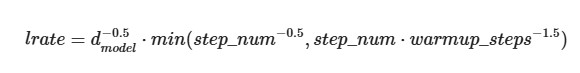   


In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("Ïäù=3")

Ïäù=3


Í∑∏Îü¨Î©¥ Î∞©Í∏à Ï†ïÏùòÌïú Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ Í≥ÑÌöçÏùÑ ÏãúÍ∞ÅÌôîÌï¥ Î¥ÖÏãúÎã§. ÏúÑÏóê Ïñ∏Í∏âÌïú ÏàòÏãùÏùÄ step_num‚àí0.5Ïóê ÎπÑÎ°ÄÌïòÎäî Î∂ÄÎ∂ÑÍ≥º step_numÏóê ÎπÑÎ°ÄÌïòÎäî Î∂ÄÎ∂Ñ Ï§ë ÏûëÏùÄ Ï™ΩÏùÑ ÌÉùÌïòÎèÑÎ°ù ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÌïôÏäµ Ï¥àÍ∏∞ÏóêÎäî learning_rateÍ∞Ä step_numÏóê ÎπÑÎ°ÄÌï¥ÏÑú Ï¶ùÍ∞ÄÌïòÎã§Í∞Ä Ïù¥ÌõÑÎ°úÎäî Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Text(0.5, 0, 'Train Step')

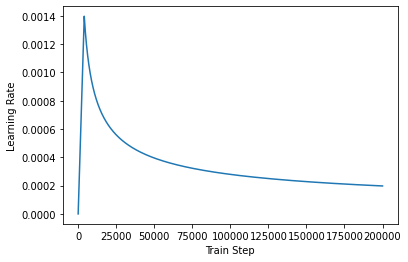

In [34]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

### 4. Î™®Îç∏ Ïª¥ÌååÏùº
ÏÜêÏã§ Ìï®ÏàòÏôÄ Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(learning rate)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Ïª¥ÌååÏùºÌï©ÎãàÎã§.

In [35]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

Ïäù=3


### 5. ÌõàÎ†®ÌïòÍ∏∞
Ïù¥Ï†ú ÌïôÏäµÏùÑ ÏßÑÌñâÌï¥ Î¥ÖÏãúÎã§.

In [36]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
689/689 [==============================] - 45s 56ms/step - loss: 2.1126 - accuracy: 0.0430
Epoch 2/10
689/689 [==============================] - 39s 56ms/step - loss: 1.4956 - accuracy: 0.0794
Epoch 3/10
689/689 [==============================] - 39s 56ms/step - loss: 1.3921 - accuracy: 0.0863
Epoch 4/10
689/689 [==============================] - 39s 56ms/step - loss: 1.3338 - accuracy: 0.0906
Epoch 5/10
689/689 [==============================] - 39s 56ms/step - loss: 1.2834 - accuracy: 0.0944
Epoch 6/10
689/689 [==============================] - 39s 56ms/step - loss: 1.2380 - accuracy: 0.0979
Epoch 7/10
689/689 [==============================] - 38s 56ms/step - loss: 1.1835 - accuracy: 0.1023
Epoch 8/10
689/689 [==============================] - 38s 56ms/step - loss: 1.1218 - accuracy: 0.1075
Epoch 9/10
689/689 [==============================] - 39s 56ms/step - loss: 1.0638 - accuracy: 0.1133
Epoch 10/10
689/689 [==============================] - 39s 56ms/step - loss: 1.010

# 9-13. Ï±óÎ¥á ÌÖåÏä§Ìä∏ÌïòÍ∏∞
ÏòàÏ∏°(inference) Îã®Í≥ÑÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ Í±∞Ïπ©ÎãàÎã§.

1. ÏÉàÎ°úÏö¥ ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑúÎäî ÌõàÎ†® ÎïåÏôÄ ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨Î•º Í±∞ÏπúÎã§.
2. ÏûÖÎ†• Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†, START_TOKENÍ≥º END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. Ìå®Îî© ÎßàÏä§ÌÇπÍ≥º Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
4. ÎîîÏΩîÎçîÎäî ÏûÖÎ†• ÏãúÌÄÄÏä§Î°úÎ∂ÄÌÑ∞ Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïúÎã§.
5. ÎîîÏΩîÎçîÎäî ÏòàÏ∏°Îêú Îã§Ïùå Îã®Ïñ¥Î•º Í∏∞Ï°¥Ïùò ÏûÖÎ†• ÏãúÌÄÄÏä§Ïóê Ï∂îÍ∞ÄÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.
6. END_TOKENÏù¥ ÏòàÏ∏°ÎêòÍ±∞ÎÇò Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Ïóê ÎèÑÎã¨ÌïòÎ©¥ ÎîîÏΩîÎçîÎäî ÎèôÏûëÏùÑ Î©àÏ∂òÎã§.   

ÏúÑÏùò Í≥ºÏ†ïÏùÑ Î™®Îëê Îã¥ÏùÄ decoder_inference() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [37]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
  # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
  # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
  for i in range(MAX_LENGTH):
    # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
    # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("Ïäù=3")

Ïäù=3


ÏûÑÏùòÏùò ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú decoder_inference() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÎäî sentence_generation() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [38]:
def sentence_generation(sentence):
  # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
  prediction = decoder_inference(sentence)

  # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('ÏûÖÎ†• : {}'.format(sentence))
  print('Ï∂úÎ†• : {}'.format(predicted_sentence))

  return predicted_sentence
print("Ïäù=3")

Ïäù=3


ÏûÑÏùòÏùò Î¨∏Ïû•ÏúºÎ°úÎ∂ÄÌÑ∞ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÏñ¥Î¥ÖÏãúÎã§.

In [39]:
sentence_generation('Where have you been?')

ÏûÖÎ†• : Where have you been?
Ï∂úÎ†• : i don t know .


'i don t know .'

In [40]:
sentence_generation("It's a trap")

ÏûÖÎ†• : It's a trap
Ï∂úÎ†• : i m not sure it s so much fun .


'i m not sure it s so much fun .'

### ÎÅù